In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
path_train = 'train.csv'
path_test = 'test.csv'

In [3]:
train_df_raw = pd.read_csv(path_train)

In [4]:
train_df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


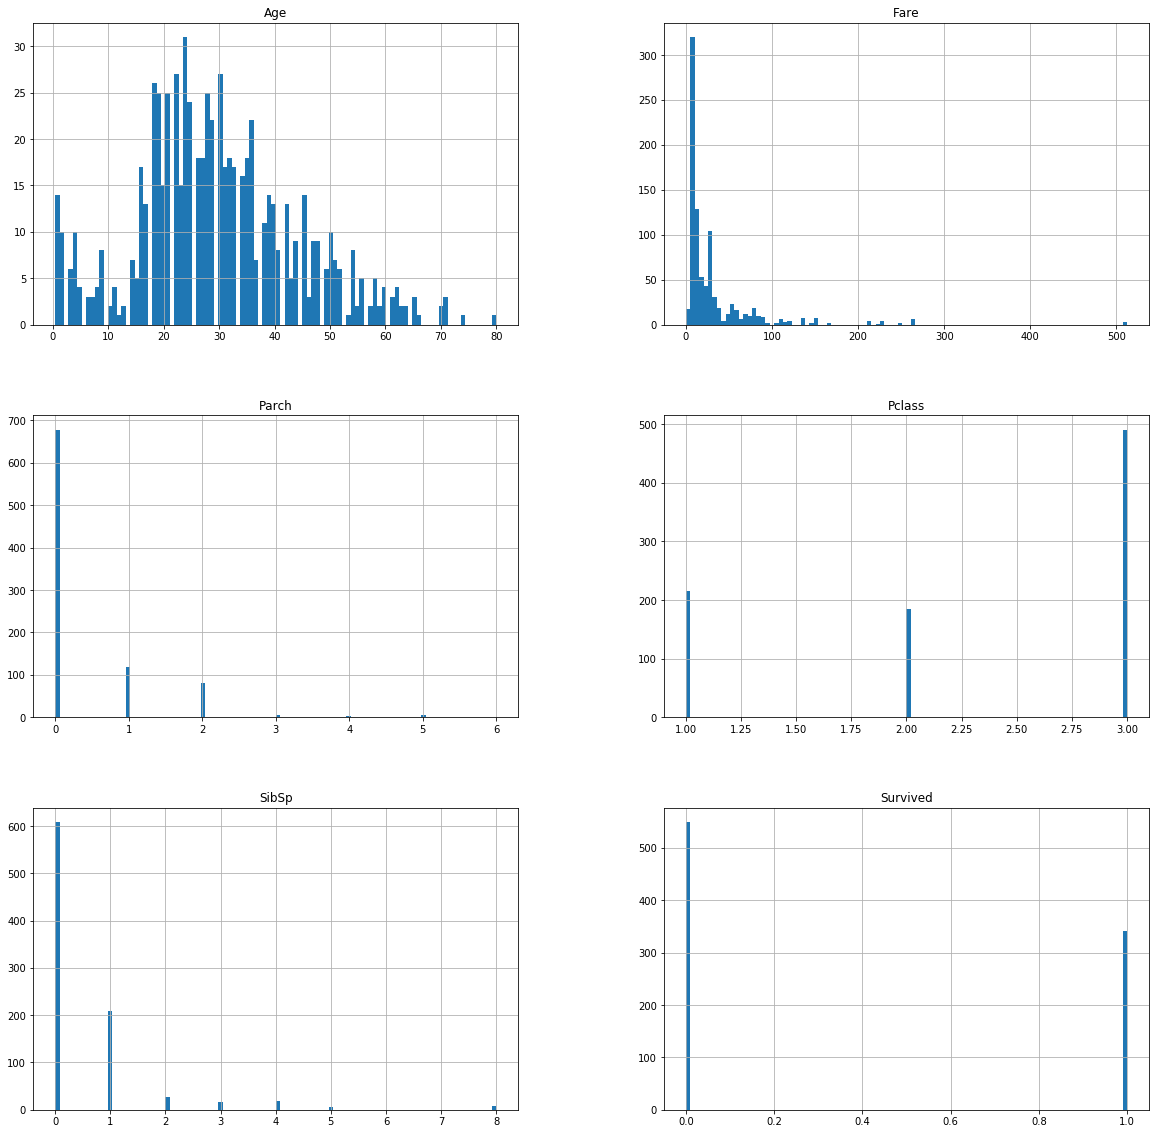

In [8]:
train_df_raw.drop(['PassengerId'], axis=1).hist(bins=100, figsize=(20,20))
plt.show()

In [75]:
train_df = train_df_raw.copy()

In [78]:
set(p for p in train_df['Sex'])

{'female', 'male'}

In [79]:
sex_dictionary = {
    'female': 0,
    'male': 1
}

In [80]:
train_df['Sex'] = train_df['Sex'].map(sex_dictionary)

In [82]:
train_df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [83]:
set(p for p in train_df['Embarked'])

{'C', 'Q', 'S', nan}

In [84]:
embarked_dictionary = {
    'C': 0,
    'Q': 1,
    'S': 2,
    pd.np.nan: 3
}

In [86]:
train_df['Embarked'] = train_df['Embarked'].map(embarked_dictionary)

In [88]:
train_df['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

In [89]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [92]:
train_df['Fare'] = train_df['Fare'].interpolate()

In [93]:
train_df['Cabin'].fillna('U', inplace=True)

In [95]:
train_df['Cabin'] = train_df['Cabin'].str[:1]

In [97]:
set(p for p in train_df['Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'}

In [98]:
cabin_dictionary = {
    'A': 0,
    'B': 1,
    'C': 2, 
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7,
    'U': 8
}

In [99]:
train_df['Cabin'] = train_df['Cabin'].map(cabin_dictionary)

In [106]:
train_df['Title'] = pd.Series(
    (name.split('.')[0].split(',')[1].strip() for name in train_df['Name']),
    index = train_df.index
)

In [107]:
set(p.strip() for p in train_df['Title'])

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [154]:
title_dictionary = {
    'Capt': 0,
    'Col': 1,
    'Don': 2,
    'Dr': 3,
    'Jonkheer': 4,
    'Lady': 5,
    'Major': 6,
    'Master': 7,
    'Miss': 8,
    'Mlle': 9,
    'Mme': 10,
    'Mr': 11,
    'Mrs': 12,
    'Ms': 13,
    'Rev': 14,
    'Sir': 15,
    'the Countess': 16,
    'Dona': 17
}

In [111]:
train_df['Title'] = train_df['Title'].map(title_dictionary)

In [113]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [114]:
train_df['isAlone'] = np.where(train_df['Family_size'] != 1, 0, 1)

In [116]:
target = train_df['Survived']

In [117]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2,11,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,12,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2,8,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,12,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2,11,1,1


In [118]:
train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1, inplace=True)

In [119]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_size,isAlone
0,3,1,22.0,1,0,7.2500,8,2,11,2,0
1,1,0,38.0,1,0,71.2833,2,0,12,2,0
2,3,0,26.0,0,0,7.9250,8,2,8,1,1
3,1,0,35.0,1,0,53.1000,2,2,12,2,0
4,3,1,35.0,0,0,8.0500,8,2,11,1,1


In [120]:
target = to_categorical(target)

In [121]:
target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [122]:
sc = StandardScaler()

In [123]:
predictors = pd.DataFrame(
    sc.fit_transform(train_df.values), 
    index=train_df.index, 
    columns=train_df.columns)

In [124]:
predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_size,isAlone
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.522067,0.581114,0.414641,0.059160,-1.231645
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.917594,-1.938460,0.961158,0.059160,-1.231645
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.522067,0.581114,-1.224909,-0.560975,0.811922
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,-1.917594,0.581114,0.961158,0.059160,-1.231645
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.522067,0.581114,0.414641,-0.560975,0.811922


In [125]:
X = predictors.as_matrix()

In [129]:
n_cols = X.shape[1]

In [183]:
def build_ann(optimizer='adam', patience=2, n_nodes=10, n_cols=11):
    # Initializing our ANN
    model_1 = Sequential()
    model_1.add(Dense(
        n_nodes,  
        activation='relu', 
        input_shape=(n_cols,)))
    
    model_1.add(Dense(
        n_nodes,  
        activation='relu'))
    
    model_1.add(Dense(
        2,  
        activation='softmax'))
    model_1.compile(
        optimizer=optimizer, 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])
    return model_1

In [131]:
early_stopping_monitor = EarlyStopping(patience=2)

In [184]:
ann = build_ann(optimizer='adam', patience=2, n_nodes=50, n_cols=n_cols)

In [196]:
ann.fit(
    X, 
    target, 
#     batch_size=10, 
    epochs=100, 
#     validation_split=0.1, 
    callbacks=[early_stopping_monitor])

Epoch 1/100
891/891 [==============================] - 0s 54us/step - loss: 0.3684 - acc: 0.8530
Epoch 2/100
891/891 [==============================] - 0s 47us/step - loss: 0.3689 - acc: 0.8485
Epoch 3/100
891/891 [==============================] - 0s 55us/step - loss: 0.3628 - acc: 0.8496
Epoch 4/100
891/891 [==============================] - 0s 65us/step - loss: 0.3602 - acc: 0.8575
Epoch 5/100
891/891 [==============================] - 0s 61us/step - loss: 0.3603 - acc: 0.8620
Epoch 6/100
891/891 [==============================] - 0s 53us/step - loss: 0.3573 - acc: 0.8519
Epoch 7/100
891/891 [==============================] - 0s 60us/step - loss: 0.3553 - acc: 0.8575
Epoch 8/100
891/891 [==============================] - 0s 61us/step - loss: 0.3554 - acc: 0.8563
Epoch 9/100
891/891 [==============================] - 0s 71us/step - loss: 0.3519 - acc: 0.8575
Epoch 10/100
891/891 [==============================] - 0s 57us/step - loss: 0.3498 - acc: 0.8664
Epoch 11/100
891/891 [=======

891/891 [==============================] - 0s 61us/step - loss: 0.2783 - acc: 0.8889
Epoch 85/100
891/891 [==============================] - 0s 55us/step - loss: 0.2761 - acc: 0.8900
Epoch 86/100
891/891 [==============================] - 0s 66us/step - loss: 0.2780 - acc: 0.8900
Epoch 87/100
891/891 [==============================] - 0s 55us/step - loss: 0.2773 - acc: 0.8855
Epoch 88/100
891/891 [==============================] - 0s 67us/step - loss: 0.2743 - acc: 0.8967
Epoch 89/100
891/891 [==============================] - 0s 59us/step - loss: 0.2757 - acc: 0.8900
Epoch 90/100
891/891 [==============================] - 0s 58us/step - loss: 0.2703 - acc: 0.8934
Epoch 91/100
891/891 [==============================] - 0s 64us/step - loss: 0.2758 - acc: 0.8911
Epoch 92/100
891/891 [==============================] - 0s 52us/step - loss: 0.2738 - acc: 0.8934
Epoch 93/100
891/891 [==============================] - 0s 46us/step - loss: 0.2689 - acc: 0.8900
Epoch 94/100
891/891 [===========

# PROCESS TEST DATA

In [134]:
test_df_raw = pd.read_csv(path_test)

In [136]:
test_df_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [137]:
test_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [138]:
test_df = test_df_raw.copy()

In [139]:
set(p for p in test_df['Sex'])

{'female', 'male'}

In [140]:
test_df['Sex'] = test_df['Sex'].map(sex_dictionary)

In [141]:
test_df['Sex'].head()

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64

In [142]:
set(p for p in test_df['Embarked'])

{'C', 'Q', 'S'}

In [143]:
test_df['Embarked'] = test_df['Embarked'].map(embarked_dictionary)

In [144]:
test_df['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [145]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [146]:
test_df['Fare'] = test_df['Fare'].interpolate()

In [148]:
test_df['Cabin'].fillna('U', inplace=True)

In [149]:
test_df['Cabin'] = test_df['Cabin'].str[:1]

In [150]:
set(p for p in test_df['Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'}

In [151]:
test_df['Cabin'] = test_df['Cabin'].map(cabin_dictionary)

In [152]:
test_df['Title'] = pd.Series(
    (name.split('.')[0].split(',')[1].strip() for name in test_df['Name']),
    index = test_df.index
)

In [153]:
set(p.strip() for p in test_df['Title'])

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

In [155]:
test_df['Title'] = test_df['Title'].map(title_dictionary)

In [156]:
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [157]:
test_df['isAlone'] = np.where(test_df['Family_size'] != 1, 0, 1)

In [158]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,isAlone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,8,1,11,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,8,2,12,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,8,1,11,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,8,2,11,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,8,2,12,3,0


In [159]:
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [161]:
test_predictors = pd.DataFrame(
    sc.fit_transform(test_df.values), 
    index=test_df.index, 
    columns=test_df.columns)

In [162]:
test_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_size,isAlone
0,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.497185,0.50866,-0.470915,0.356809,-0.553443,0.807573
1,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.512048,0.50866,0.700767,0.930448,0.105643,-1.238278
2,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.463874,0.50866,-0.470915,0.356809,-0.553443,0.807573
3,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.482248,0.50866,0.700767,0.356809,-0.553443,0.807573
4,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.417269,0.50866,0.700767,0.930448,0.764728,-1.238278


In [197]:
predictions = ann.predict(test_predictors.as_matrix())

In [198]:
predictions

array([[9.47871625e-01, 5.21283410e-02],
       [9.06299949e-01, 9.37000215e-02],
       [9.77373958e-01, 2.26261131e-02],
       [9.01856959e-01, 9.81430560e-02],
       [7.58173287e-01, 2.41826683e-01],
       [9.45350468e-01, 5.46495616e-02],
       [2.15076402e-01, 7.84923613e-01],
       [9.62712049e-01, 3.72879766e-02],
       [6.51559010e-02, 9.34844017e-01],
       [9.82909620e-01, 1.70903709e-02],
       [8.95213723e-01, 1.04786299e-01],
       [4.37738478e-01, 5.62261462e-01],
       [4.23288380e-04, 9.99576747e-01],
       [9.98384714e-01, 1.61533221e-03],
       [5.96176651e-05, 9.99940395e-01],
       [3.75771672e-02, 9.62422788e-01],
       [9.56204176e-01, 4.37958390e-02],
       [6.33764386e-01, 3.66235673e-01],
       [9.02825236e-01, 9.71747115e-02],
       [3.47974151e-01, 6.52025878e-01],
       [9.85811710e-01, 1.41882701e-02],
       [1.24167660e-02, 9.87583220e-01],
       [2.30416859e-04, 9.99769628e-01],
       [7.53606319e-01, 2.46393725e-01],
       [3.227122

In [199]:
predictions = predictions[:, 1]

In [205]:
ann_prediction = predictions > 0.7

In [206]:
ann_prediction = ann_prediction.astype(int)

In [207]:
ann_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [208]:
predicted_prob_pd = pd.DataFrame({'Survived':ann_prediction})

In [209]:
test_df_raw['Survived'] = predicted_prob_pd['Survived']
test_df_raw[['PassengerId', 'Survived']].to_csv('submit.csv',index=False)